This notebook peforms Villarubia's blind tip reconstruction from noisy image data

## load required packages and test data

In [1]:
using Flux
using Flux.Data: DataLoader
using Plots
using BSON: @save, @load
using Random
using Statistics
using Revise, MDToolbox

In [2]:
@load "prepare_test_data.bson" width height resolution radius angle param models tip surfs images images_randn

## Blind-tip reconstruction from noisy Image

In [3]:
idilation

idilation (generic function with 1 method)

In [4]:
T = [0.1, 1.0, 10.0, 20.0, 50.0, 70.0, 100.0]
loss_over_lambdas_array = []
P_over_lambdas_array = []

nrealization = 10
Random.seed!(777);

for irealization = 1:nrealization
    @info irealization

    for iframe = 1:length(images)
        images_randn[iframe] .= images[iframe] .+ 3.0 .* randn(Float64, size(images[iframe]))
    end

    P_over_lambdas = []
    loss_over_lambdas = []

    for t in T
        m_P = similar(tip)
        m_P .= 0.0

        itip_estimate!(m_P, images_randn[1:20], thresh=t);

        loss = 0.0
        for image in images_randn[1:20]
            loss += mean((idilation(ierosion(image, m_P), m_P) .- image).^2)
        end
        loss = loss / length(images_randn[1:20])
        
        push!(P_over_lambdas, m_P)
        push!(loss_over_lambdas, loss)
    end
    
    push!(P_over_lambdas_array, P_over_lambdas)
    push!(loss_over_lambdas_array, loss_over_lambdas)
end

Processed 20 image
159 refinements 
Processed 20 image
157 refinements 
Processed 20 image
94 refinements 
Processed 20 image
74 refinements 
Processed 20 image
36 refinements 
Processed 20 image
23 refinements 
Processed 20 image
9 refinements 
Processed 20 image
163 refinements 
Processed 20 image
152 refinements 
Processed 20 image
89 refinements 
Processed 20 image
41 refinements 
Processed 20 image
26 refinements 
Processed 20 image
13 refinements 
Processed 20 image
8 refinements 
Processed 20 image
286 refinements 
Processed 20 image
134 refinements 
Processed 20 image
85 refinements 
Processed 20 image
48 refinements 
Processed 20 image
30 refinements 
Processed 20 image
14 refinements 
Processed 20 image
7 refinements 
Processed 20 image
281 refinements 
Processed 20 image
166 refinements 
Processed 20 image
78 refinements 
Processed 20 image
62 refinements 
Processed 20 image
32 refinements 
Processed 20 image
15 refinements 
Processed 20 image
8 refinements 
Processed 20 ima

┌ Info: 1
└ @ Main In[4]:9
┌ Info: 2
└ @ Main In[4]:9
┌ Info: 3
└ @ Main In[4]:9
┌ Info: 4
└ @ Main In[4]:9
┌ Info: 5
└ @ Main In[4]:9
┌ Info: 6
└ @ Main In[4]:9
┌ Info: 7
└ @ Main In[4]:9
┌ Info: 8
└ @ Main In[4]:9
┌ Info: 9
└ @ Main In[4]:9
┌ Info: 10
└ @ Main In[4]:9


In [5]:
gr()

Plots.GRBackend()

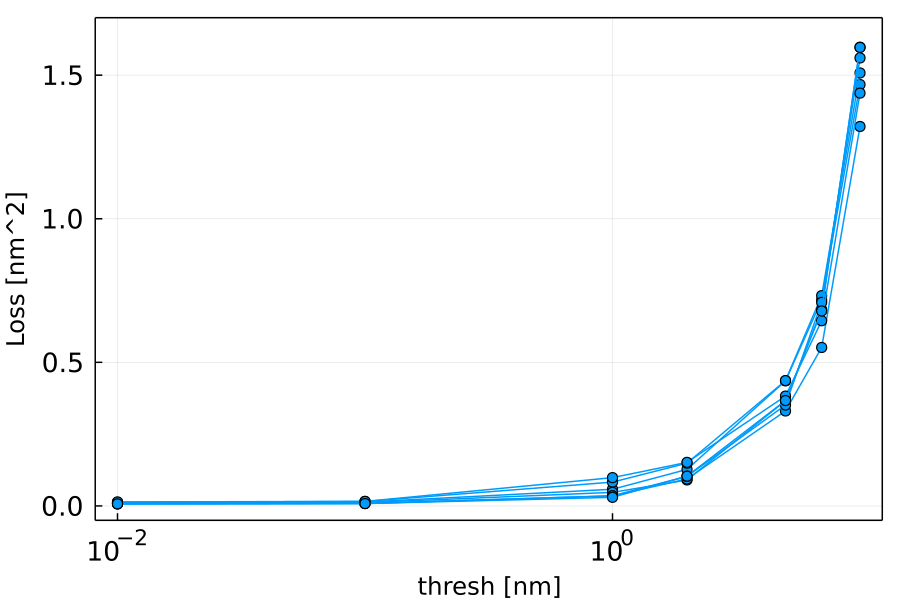

In [9]:
plot(T / 10.0, loss_over_lambdas_array[1] / 100.0, xaxis=:log, framestyle = :box, xlabel="threshold T", ylabel="loss [nm^2]", label=nothing, linewidth=1.0, markershape=:circle, dpi=150, fmt=:png, color=1, 
        xtickfontsize=12, ytickfontsize=12, legendfontsize=12)
for i = 2:length(T)
    plot!(T / 10.0, loss_over_lambdas_array[i] / 100.0, xaxis=:log, framestyle = :box, xlabel="threshold T", ylabel="loss [nm^2]", label=nothing, linewidth=1.0, markershape=:circle, dpi=150, fmt=:png, color=1, 
          xtickfontsize=12, ytickfontsize=12, legendfontsize=12)
end
ylims!(-0.05, 1.7)
xlabel!("thresh [nm]", fontsize=35)
p = ylabel!("Loss [nm^2]", fontsize=35)

In [10]:
savefig(p, "blindtip_original_randn01.png")

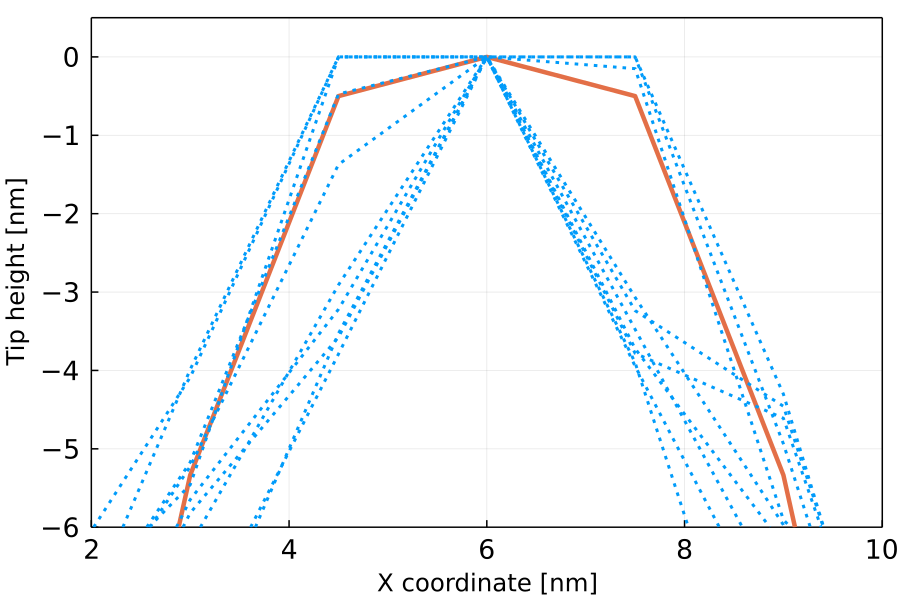

In [15]:
plot(collect(1:9) .* resolution / 10.0, tip[4, :] / 10.0, linewidth=3, label="ground truth", color=2, 
    xtickfontsize=12, ytickfontsize=12, legendfontsize=12)
for irealization = 1:nrealization
    if irealization == nrealization
        plot!(collect(1:9) .* resolution / 10.0, P_over_lambdas_array[irealization][4][4, :] / 10.0, linewidth=2, linestyle=:dot, color=1, label="reconstruction", framestyle=:box, dpi=150, fmt=:png)
    else
        plot!(collect(1:9) .* resolution / 10.0, P_over_lambdas_array[irealization][4][4, :] / 10.0, linewidth=2, linestyle=:dot, color=1, label=nothing, framestyle=:box, dpi=150, fmt=:png, legend=nothing)
    end
end
ylims!((-6, 0.5))
xlims!((2, 10))
xlabel!("X coordinate [nm]", fontsize=35)
p = ylabel!("Tip height [nm]", fontsize=35)

In [181]:
savefig(p, "blindtip_original_randn02.png")

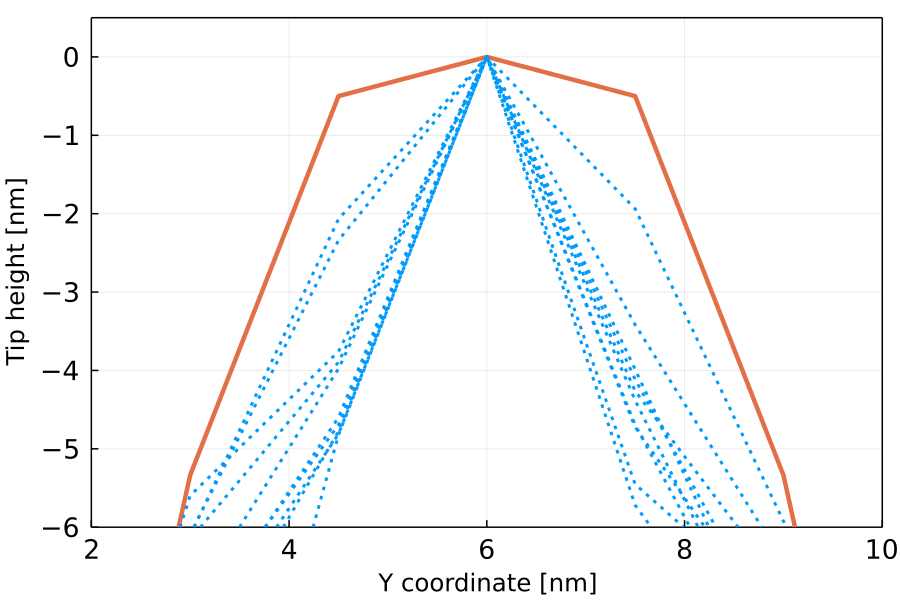

In [220]:
plot(collect(1:9) .* resolution / 10.0, tip[:, 4] / 10.0, linewidth=3, label="ground truth", color=2, 
     xtickfontsize=12, ytickfontsize=12, legendfontsize=12)
for irealization = 1:nrealization
    if irealization == nrealization
        plot!(collect(1:9) .* resolution / 10.0, P_over_lambdas_array[irealization][3][:, 4] / 10.0, linewidth=2, linestyle=:dot, color=1, label="reconstruction", framestyle=:box, dpi=150, fmt=:png)
    else
        plot!(collect(1:9) .* resolution / 10.0, P_over_lambdas_array[irealization][3][:, 4] / 10.0, linewidth=2, linestyle=:dot, color=1, label=nothing, framestyle=:box, dpi=150, fmt=:png, legend=nothing)
    end
end
ylims!((-6, 0.5))
xlims!((2, 10))
xlabel!("Y coordinate [nm]", fontsize=35)
p = ylabel!("Tip height [nm]", fontsize=35)

In [221]:
savefig(p, "blindtip_original_randn03.png")

In [222]:
pyplot()

Plots.PyPlotBackend()

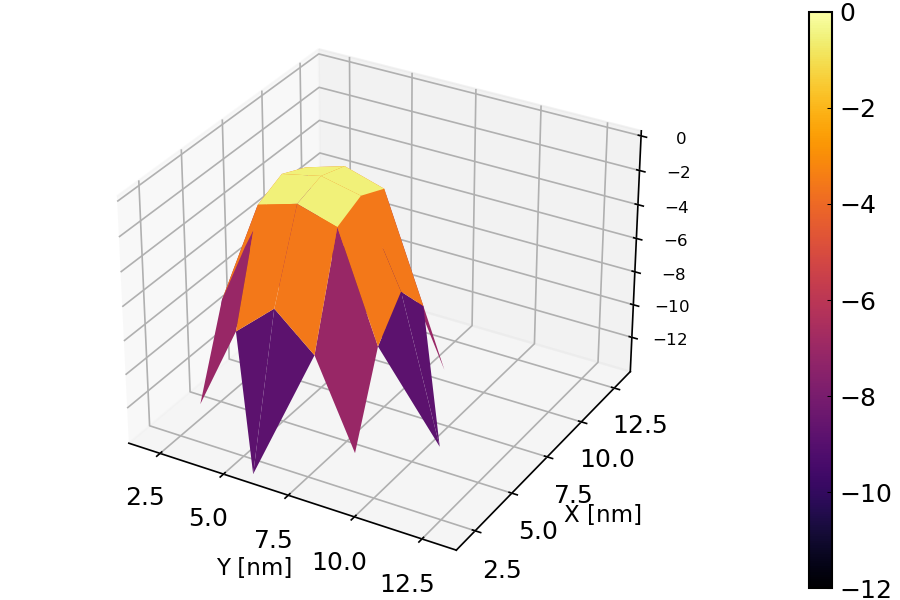

In [185]:
tip_tmp = deepcopy(tip)
tip_tmp[tip .< -150.0] .= NaN

plot(collect(1:9) .* resolution ./ 10.0, collect(1:9) .* resolution ./ 10.0, tip_tmp ./ 10.0, st=:surface, dpi=150, clim=(-12, 0),
     xtickfontsize=12, ytickfontsize=12, legendfontsize=12, colorbar_tickfontsize=12)
xlabel!("Y [nm]", fontsize=35)
p = ylabel!("X [nm]", fontsize=35)
#zlabel!("Z [nm]", fontsize=35)
#zlims!((-8, 0.5))
#zlabel!("Tip height [nm]", fontsize=35)

In [186]:
savefig(p, "blindtip_original_randn04.png")

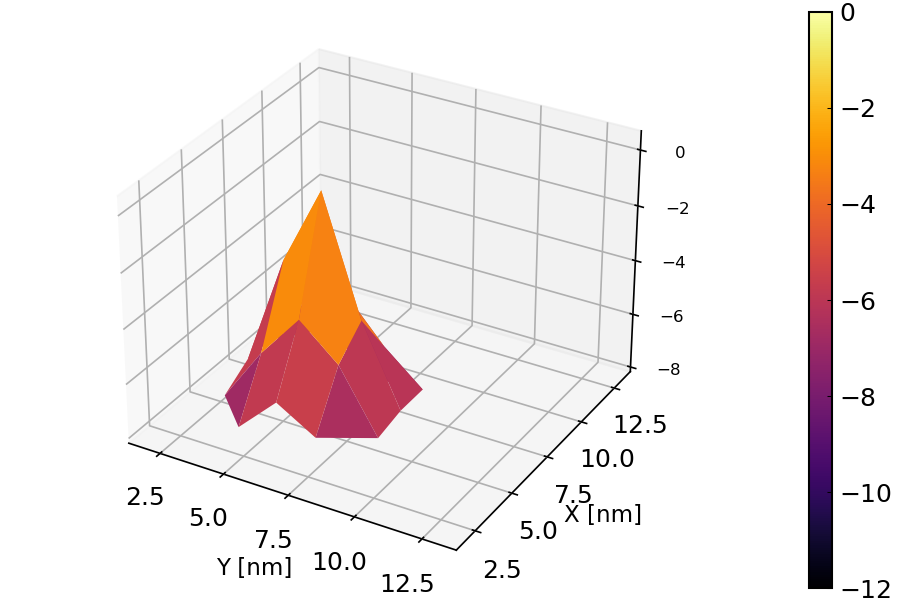

In [187]:
tip_tmp = deepcopy(P_over_lambdas_array[1][3])
tip_tmp[tip .< -120.0] .= NaN

plot(collect(1:9) .* resolution ./ 10.0, collect(1:9) .* resolution ./ 10.0, tip_tmp ./ 10.0, st=:surface, dpi=150, clim=(-12, 0), 
     xtickfontsize=12, ytickfontsize=12, legendfontsize=12, colorbar_tickfontsize=12)
zlims!((-8, 0.5))
xlabel!("Y [nm]", fontsize=35)
p = ylabel!("X [nm]", fontsize=35)
#zlabel!("Tip height [nm]", fontsize=35)

In [188]:
savefig(p, "blindtip_original_randn05.png")

In [189]:
gr()

Plots.GRBackend()

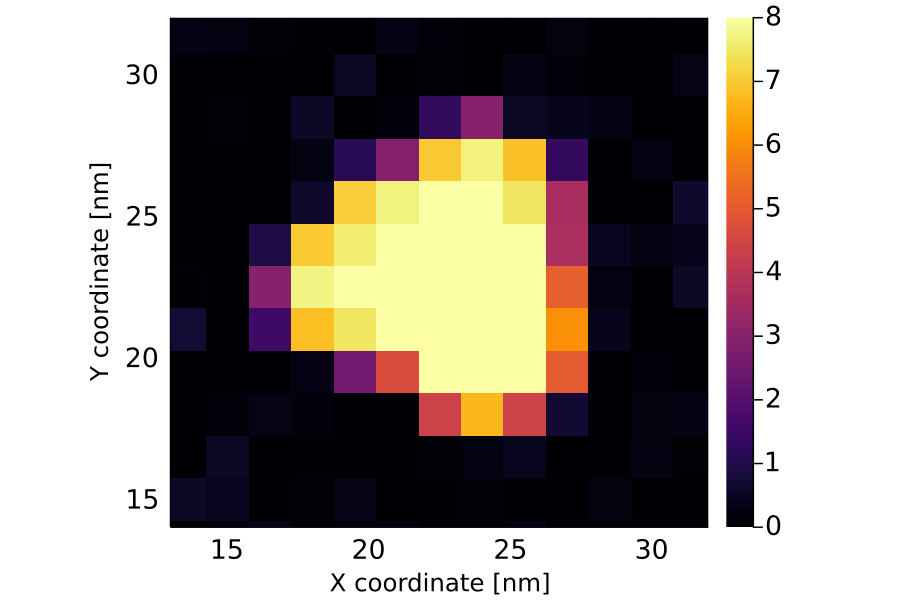

In [191]:
p = heatmap(collect(1:30) .* resolution / 10.0, collect(1:30) .* resolution / 10.0, images_randn[1] / 10.0, clim=(0, 8), dpi=150, fmt=:png, aspect_ratio=:equal, 
    xtickfontsize=12, ytickfontsize=12, legendfontsize=12, colorbar_tickfontsize=12)
xlabel!("X coordinate [nm]", fontsize=35)
ylabel!("Y coordinate [nm]", fontsize=35)
xlims!(13, 32)
ylims!(14, 32)

In [192]:
savefig(p, "blindtip_original_randn06.png")

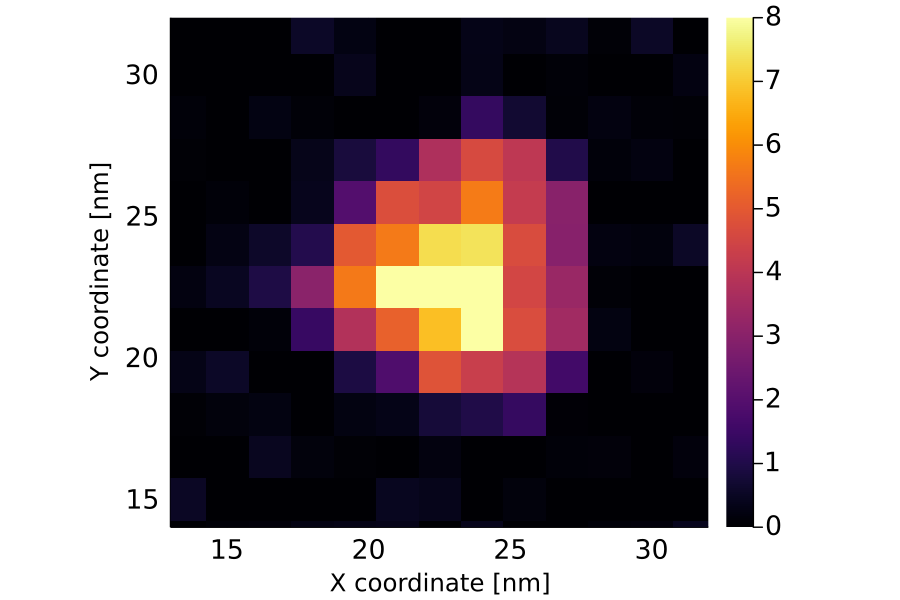

In [19]:
p = heatmap(collect(1:30) .* resolution / 10.0, collect(1:30) .* resolution / 10.0, ierosion(images_randn[1], P_over_lambdas_array[1][4]) / 10.0, clim=(0, 8), dpi=150, fmt=:png, aspect_ratio=:equal,
    xtickfontsize=12, ytickfontsize=12, legendfontsize=12, colorbar_tickfontsize=12)
xlabel!("X coordinate [nm]", fontsize=35)
ylabel!("Y coordinate [nm]", fontsize=35)
xlims!(13, 32)
ylims!(14, 32)

In [20]:
savefig(p, "blindtip_original_randn07.png")

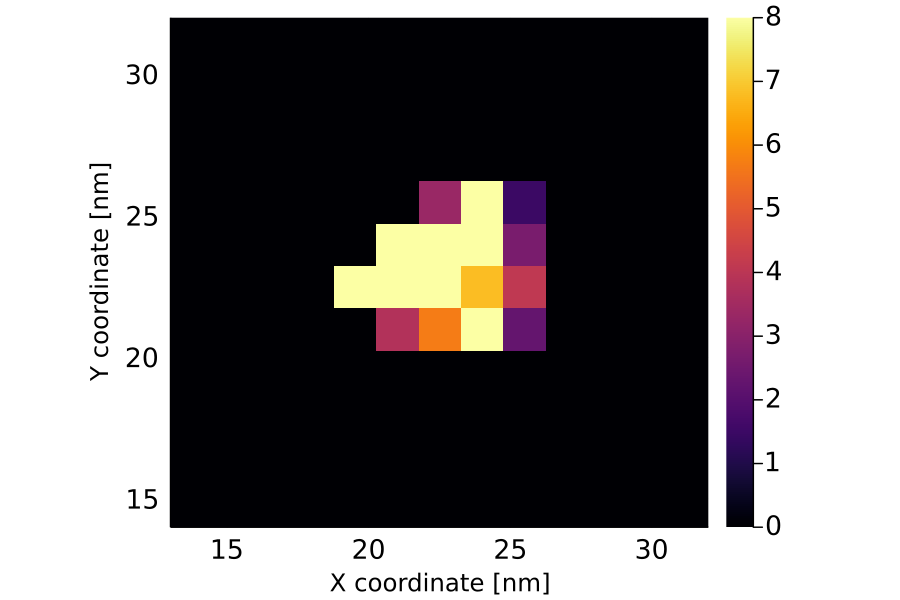

In [195]:
p = heatmap(collect(1:30) .* resolution / 10.0, collect(1:30) .* resolution / 10.0, surfs[1] / 10.0, clim=(0, 8), dpi=150, fmt=:png, aspect_ratio=:equal, 
            xtickfontsize=12, ytickfontsize=12, legendfontsize=12, colorbar_tickfontsize=12)
xlabel!("X coordinate [nm]", fontsize=35)
ylabel!("Y coordinate [nm]", fontsize=35)
xlims!(13, 32)
ylims!(14, 32)

In [196]:
savefig(p, "blindtip_original_randn08.png")

# Correlations

In [44]:
crosscor(image1, image2) = mean((image1 .- mean(image1)) .* (image2 .- mean(image2))) / (std(image1) * std(image2))
#pixel_rmsd(image1, image2) = sqrt(mean((image1 .- image2).^2))

function pixel_rmsd(image1, image2; cutoff = -80.0)
    image1_shifted = similar(image1)

    rmsd_min = Inf64
    for du = -2:2, dv = -2:2
        image1_shifted = circshift(image1, (du, dv))
        id = (image1_shifted .> cutoff) .| (image2 .> cutoff)
        tmp = sqrt(mean((image1_shifted[id] .- image2[id]).^2))
        if tmp < rmsd_min
            rmsd_min = tmp
        end
    end
    return rmsd_min
end

diff_tip = zeros(Float64, length(T)*length(P_over_lambdas_array[:][1]), 2)
count = 0
for it = 1:length(T)
    for ireal = 1:length(P_over_lambdas_array[:][it])
        c = pixel_rmsd(tip, P_over_lambdas_array[ireal][it])
        count += 1
        diff_tip[count, 1] = T[it]
        diff_tip[count, 2] = c
    end
end

In [45]:
gr()

Plots.GRBackend()

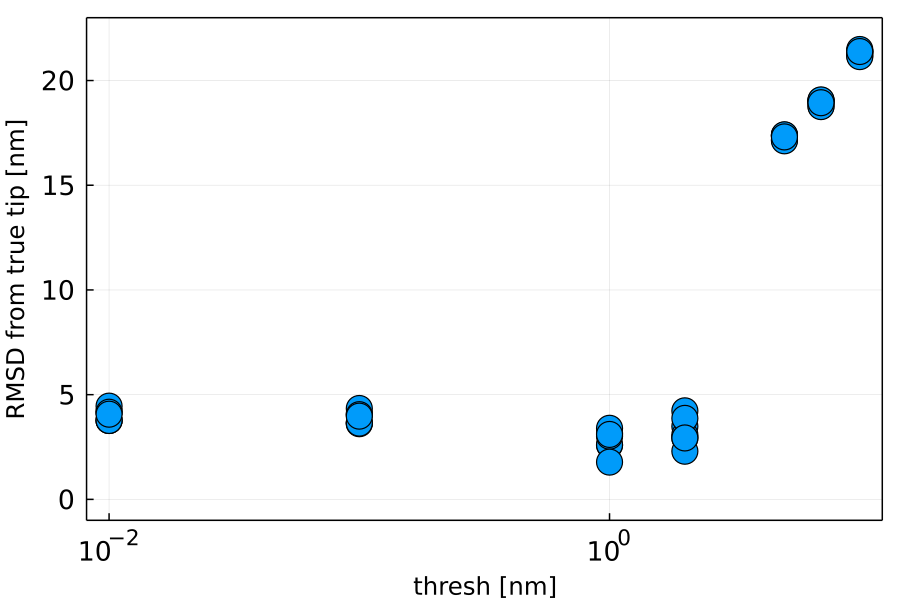

In [46]:
scatter(diff_tip[:, 1] / 10.0, diff_tip[:, 2] / 10.0, xaxis=:log, framestyle = :box, xlabel="threshold T", ylabel="RMSD frome true tip [nm]", label=nothing, linewidth=1.0, markershape=:circle, dpi=150, fmt=:png, color=1, 
        xtickfontsize=12, ytickfontsize=12, legendfontsize=12, colorbar_tickfontsize=12, markersize=10, markerstrokewidth=1)
#ylims!(-0.05, 2.3)
xlabel!("thresh [nm]", fontsize=35)
p = ylabel!("RMSD from true tip [nm]", fontsize=35)
ylims!(-1, 23)

In [47]:
diff_surf = zeros(Float64, length(T)*length(P_over_lambdas_array[:][1])*length(images), 2)
count = 0
Random.seed!(777);
images_randn = deepcopy(images)

function pixel_rmsd(image1, image2; cutoff = 0.0)
    #id = (image1 .> cutoff) .| (image2 .> cutoff)

    rmsd_min = Inf64
    for du = -2:2, dv = -2:2
        image1_shifted = circshift(image1, (du, dv))
        id = (image1 .> cutoff) .| (image2 .> cutoff)
        tmp = sqrt(mean((image1_shifted[id] .- image2[id]).^2))
        if tmp < rmsd_min
            rmsd_min = tmp
        end
    end
    return rmsd_min
end

for it = 1:length(T)
    for ireal = 1:length(P_over_lambdas_array[:][it])
        for iframe = 1:length(images)
            images_randn[iframe] .= images[iframe] .+ 3.0 .* randn(Float64, size(images[iframe]))
            c = pixel_rmsd(surfs[1], ierosion(images_randn[iframe], P_over_lambdas_array[ireal][it]))
            count += 1
            diff_surf[count, 1] = T[it]
            diff_surf[count, 2] = c
        end
    end
end

In [48]:
gr()

Plots.GRBackend()

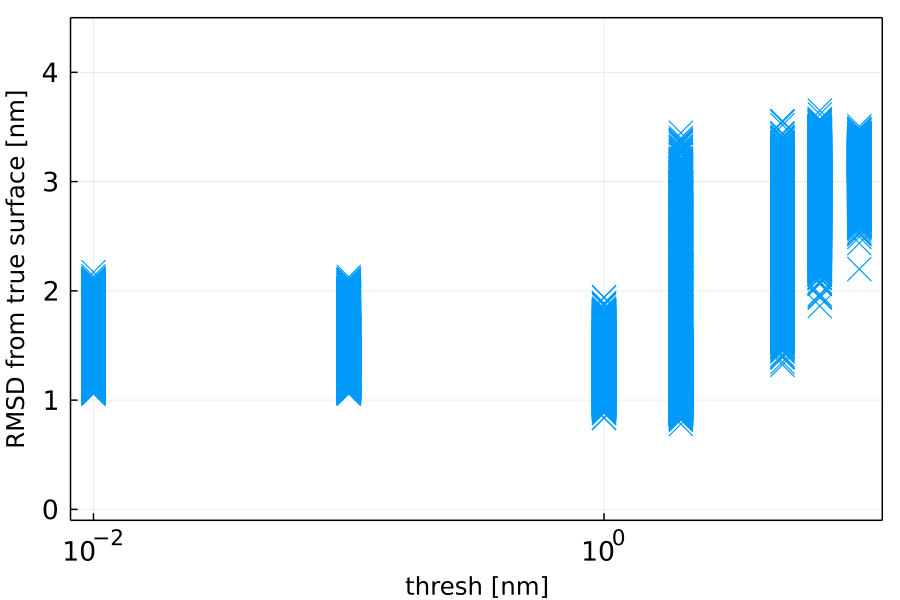

In [49]:
scatter(diff_surf[:, 1] / 10.0, diff_surf[:, 2] / 10.0, xaxis=:log, framestyle=:box, xlabel="threshold T", ylabel="RMSD frome true tip [nm]", label=nothing, linewidth=1.0, markershape=:xcross, dpi=150, fmt=:png, color=1,
        xtickfontsize=12, ytickfontsize=12, legendfontsize=12, colorbar_tickfontsize=12, markersize=8, markerstrokewidth=1)
#ylims!(-0.05, 2.3)
xlabel!("thresh [nm]", fontsize=35)
p = ylabel!("RMSD from true surface [nm]", fontsize=35)
ylims!(-0.1, 4.5)

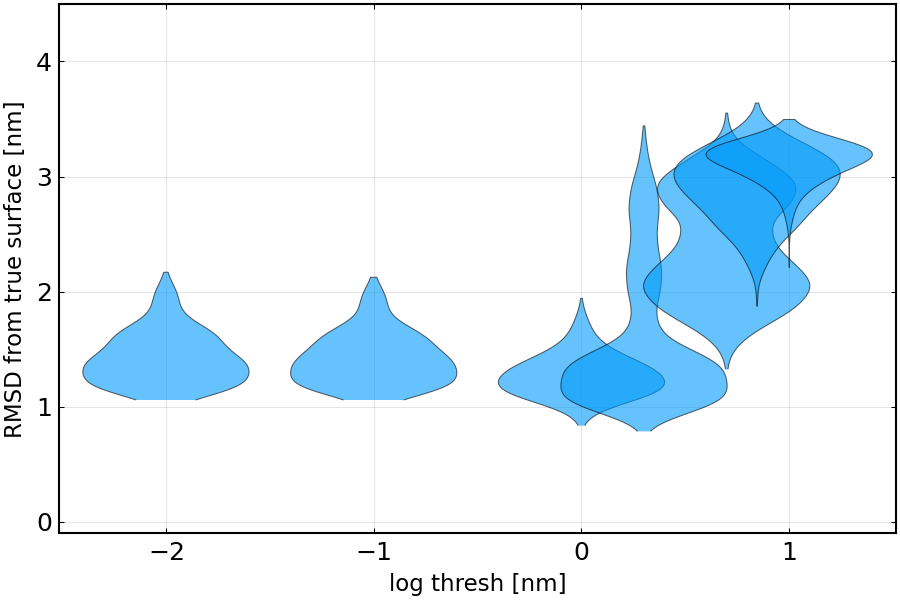

In [50]:
using StatsPlots
pyplot()

violin(log10.(diff_surf[:, 1] / 10.0), diff_surf[:, 2] / 10.0, ylim=(-0.1, 4.5),
       xtickfontsize=12, ytickfontsize=12, legendfontsize=12, 
       xlabel="log thresh [nm]", ylabel="RMSD from true surface [nm]", 
       framestyle=:box, label=nothing, linewidth=0.5, dpi=150, fmt=:png, alpha=0.6, color=1)

#ylims!(-0.1, 4.5)

# Save results

In [52]:
using BSON: @save, @load

@save "blindtip_original_randn.bson" tip T P_over_lambdas_array
@save "blindtip_original_randn_rmsd.bson" diff_tip diff_surf